In this assignment, you will analyze the Wine Quality dataset (https://archive.ics.uci.edu/dataset/186/wine+qualityLinks to an external site.). Complete the following tasks ONLY FOR "WHITE" WINE data points.

All plots should be meaningful.

Adjust the axis scales if necessary so the values are visible.

Also, add labels and figure titles so anyone can understand what each plot is about.

Create a new directory in your github cs131/a4/ and store all source codes under it.

Create a PDF file that contains all the plots and tables.

Clearly show Task IDs so TA can identify your answers.

The first line of the PDF should include the URL to the github repo.

Submit the PDF.


1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

2. Illustrate the correlation matrix of all features and the target.

3. Plot a histogram of the target value (quality).

4. Illustrate the violin plots of all features. Make sure that each plot is visible.

5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


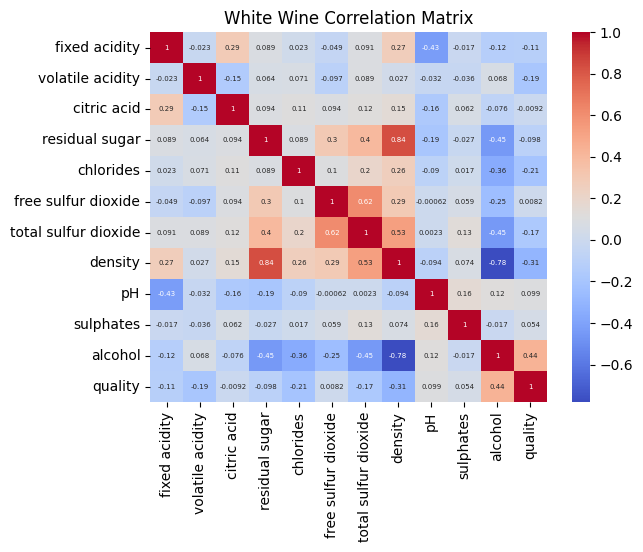

In [23]:
#2. Illustrate the correlation matrix of all features and the target.
sns.heatmap(white_wine.corr(),annot=True, annot_kws= {'size':5} ,cmap='coolwarm')
plt.title('White Wine Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Distribution of Wine Quality')

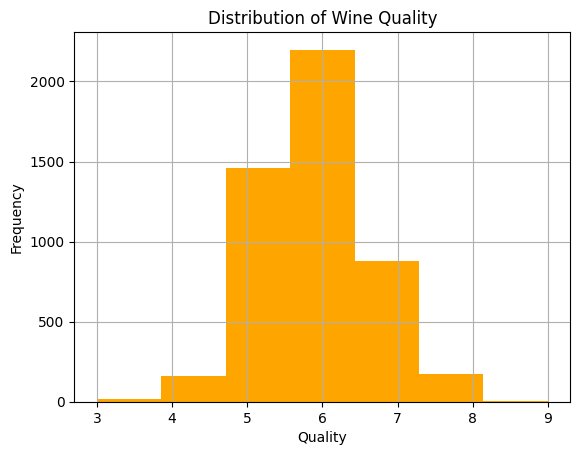

In [25]:
#3. Plot a histogram of the target value (quality).
white_wine['quality'].unique()
white_wine.hist(column='quality', bins=7, color='orange') #added 7 bins to clarify histogram
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')

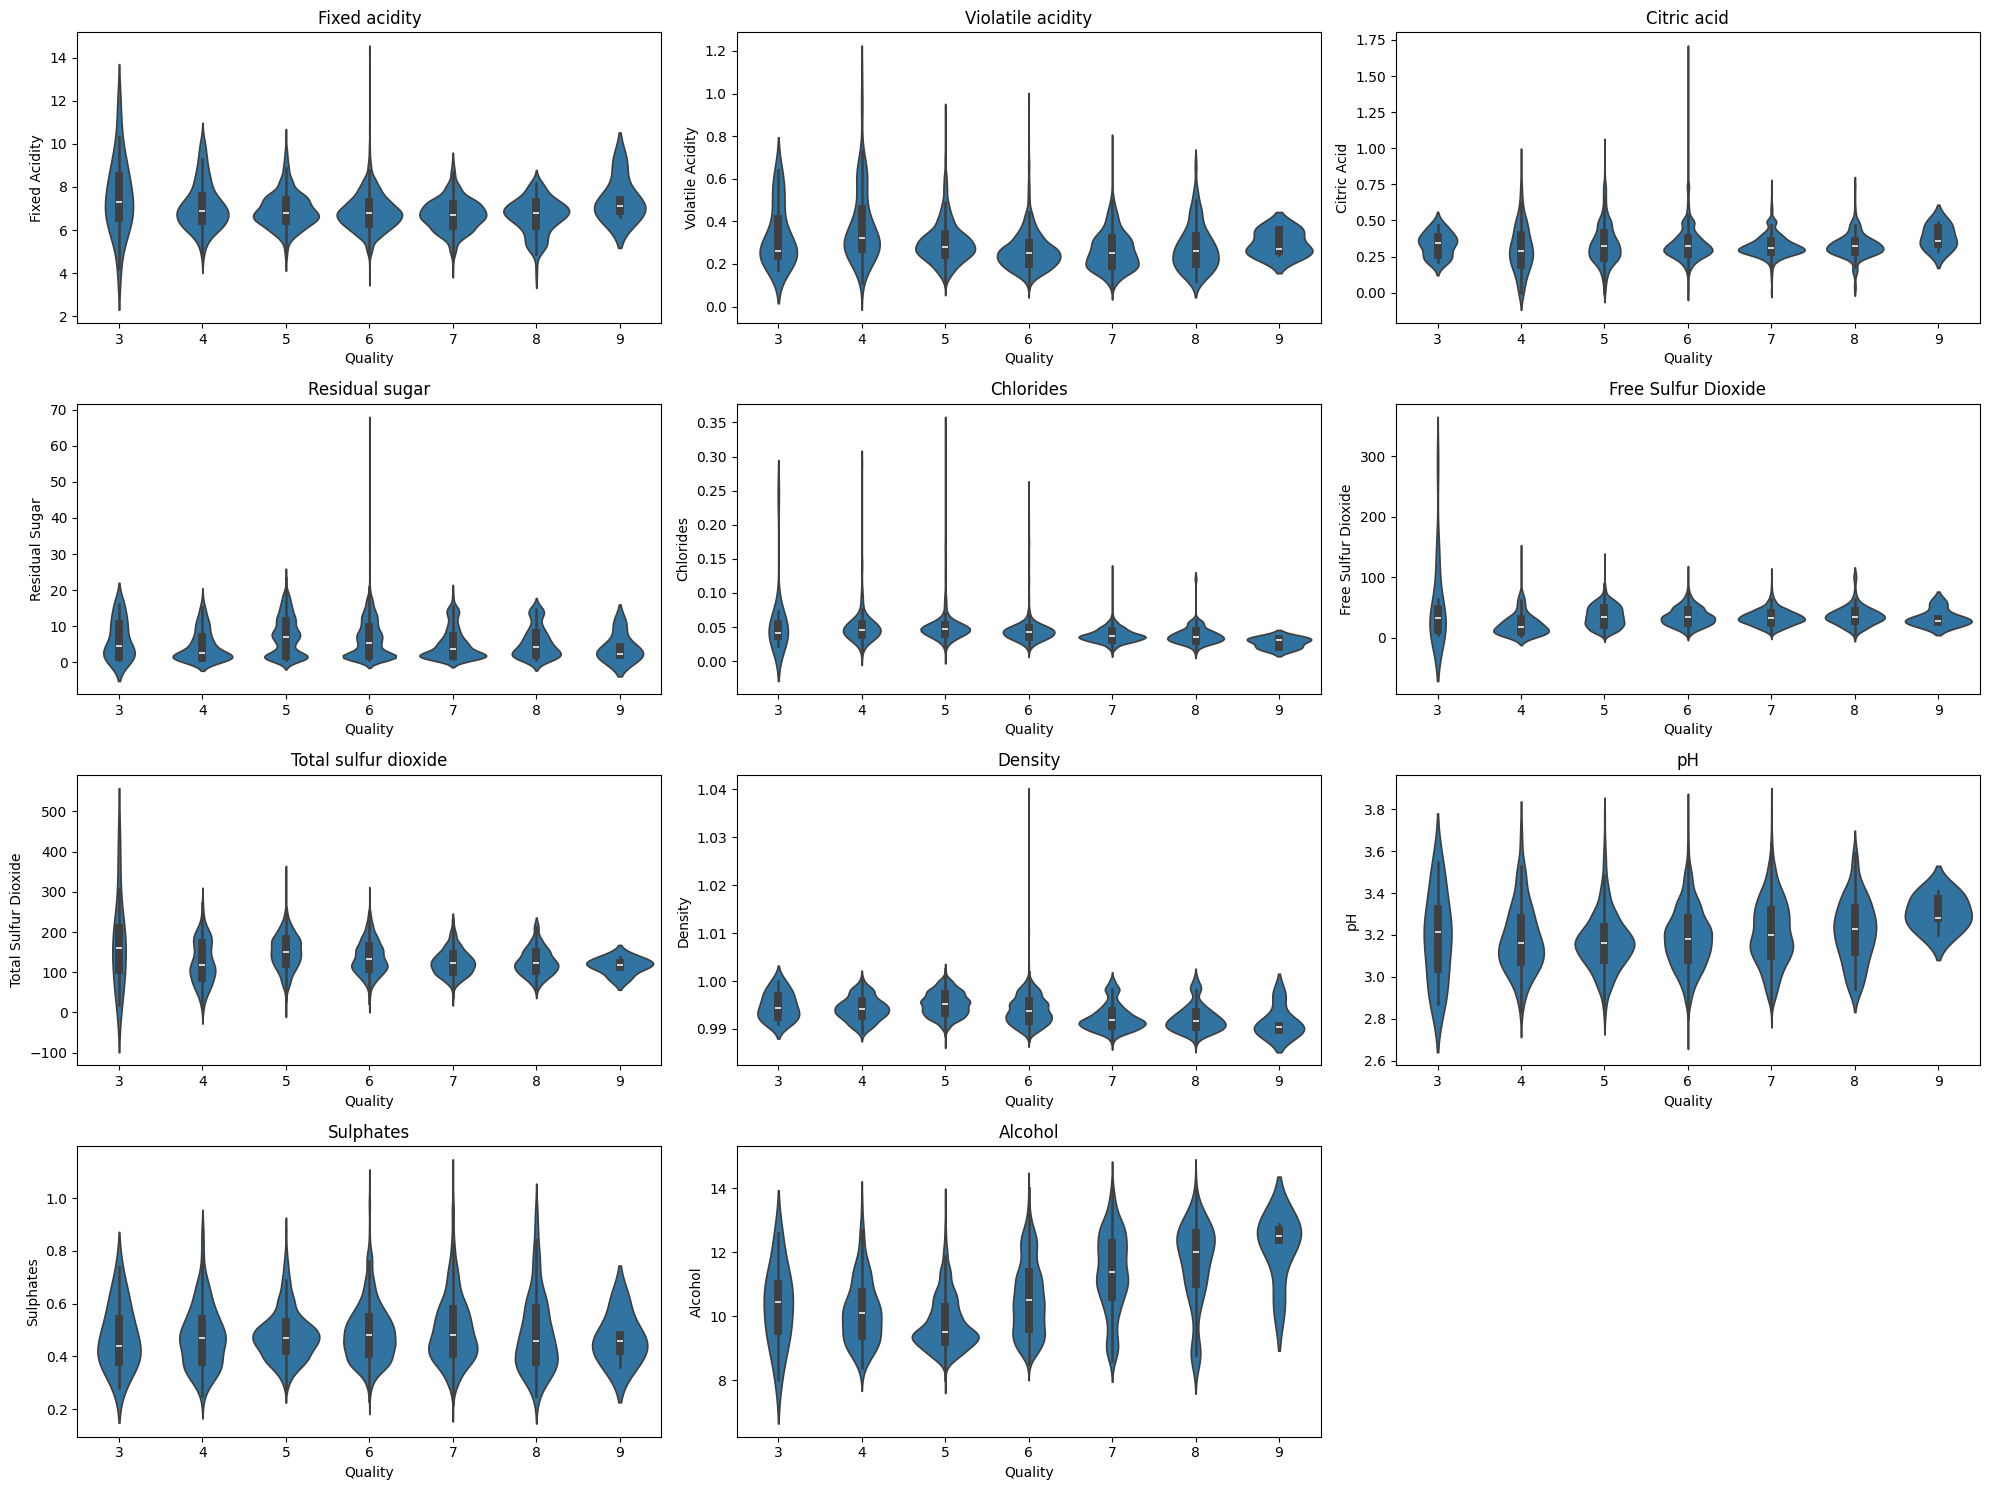

In [20]:
#3.)Illustrate the violin plots of all features. Make sure that each violin plot is visible

plt.figure(figsize=(20, 15))

# Creating a violin plots for each feature against quality for a consistient comparison
plt.subplot(4, 3, 1)
sns.violinplot(data=white_wine, x='quality', y='fixed acidity')
plt.title('Fixed acidity')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

plt.subplot(4, 3, 2)
sns.violinplot(data=white_wine, x='quality', y='volatile acidity')
plt.title('Violatile acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

plt.subplot(4, 3, 3)
sns.violinplot(data=white_wine, x='quality', y='citric acid')
plt.title('Citric acid')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')

plt.subplot(4, 3, 4)
sns.violinplot(data=white_wine, x='quality', y='residual sugar')
plt.title('Residual sugar')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')

plt.subplot(4, 3, 5)
sns.violinplot(data=white_wine, x='quality', y='chlorides')
plt.title('Chlorides')
plt.xlabel('Quality')
plt.ylabel('Chlorides')

plt.subplot(4, 3, 6)
sns.violinplot(data=white_wine, x='quality', y='free sulfur dioxide')
plt.title('Free Sulfur Dioxide')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')

plt.subplot(4, 3, 7)
sns.violinplot(data=white_wine, x='quality', y='total sulfur dioxide')
plt.title('Total sulfur dioxide')
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')

plt.subplot(4, 3, 8)
sns.violinplot(data=white_wine, x='quality', y='density')
plt.title('Density')
plt.xlabel('Quality')
plt.ylabel('Density')

plt.subplot(4, 3, 9)
sns.violinplot(data=white_wine, x='quality', y='pH')
plt.title('pH')
plt.xlabel('Quality')
plt.ylabel('pH')

plt.subplot(4, 3, 10)
sns.violinplot(data=white_wine, x='quality', y='sulphates')
plt.title('Sulphates')
plt.xlabel('Quality')
plt.ylabel('Sulphates')

plt.subplot(4, 3, 11)
sns.violinplot(data=white_wine, x='quality', y='alcohol')
plt.title('Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

plt.tight_layout()

Intercept: 2.582009399174922
Coefficient: 0.3134693019118325
RMSE: 0.7971284628753889
R^2: 0.1897253327492563


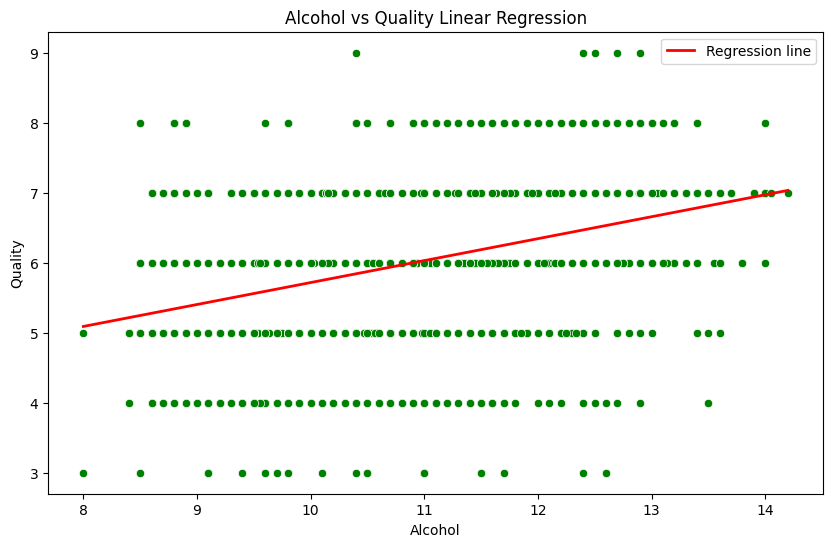

In [31]:
#5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.
#linear regression model with alcohol
x = white_wine[['alcohol']]
y = white_wine['quality']
model = LinearRegression()
model.fit(x, y)
y_prediction = model.predict(x)

#_____________________________________

#intercept, coefficient, RMSE, and R^2
intercept = model.intercept_
coefficient = model.coef_[0]
rmse = np.sqrt(mean_squared_error(y, y_prediction))
r2 = r2_score(y, y_prediction)
plt.figure(figsize=(10, 6))

#scatter plot
sns.scatterplot(x=white_wine['alcohol'], y=white_wine['quality'], color='green', marker='o')
sns.lineplot(x=white_wine['alcohol'], y=y_prediction, color='red', linewidth=2, label='Regression line')
plt.title('Alcohol vs Quality Linear Regression')
plt.xlabel('Alcohol')
plt.ylabel('Quality')


print("Intercept:", intercept)
print("Coefficient:", coefficient)
print("RMSE:", rmse)
print("R^2:", r2)

Intercept: -36.498611307001624
Coefficients: [-2.07211594  0.39889282 38.99188669]
RMSE: 0.76848726881725
R^2: 0.24690635619896484


Text(0.5, 0.98, 'Pair Plots & Predited Regression')

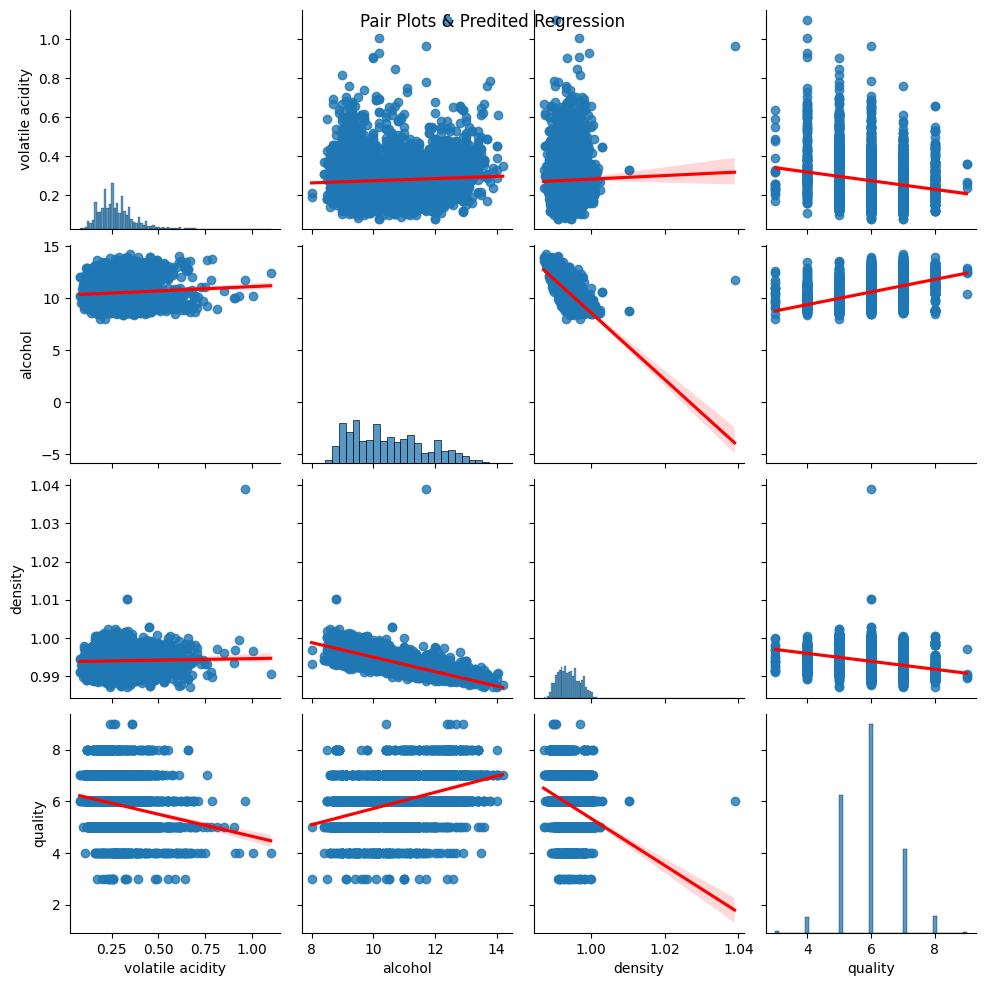

In [26]:
#6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.
x = white_wine[['volatile acidity', 'alcohol', 'density']]
y = white_wine['quality']

model = LinearRegression()
model.fit(x, y)

y_prediction = model.predict(x)

#intercept, coefficients, RMSE, and R^2
intercept = model.intercept_
coefficients = model.coef_
rmse = np.sqrt(mean_squared_error(y, y_prediction))
r2 = r2_score(y, y_prediction)

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

#dataframe of variables of interest
data = white_wine[['volatile acidity', 'alcohol', 'density', 'quality']]

#pair plots of the regression
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plots & Predited Regression')